In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grevi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
train = pd.read_csv("dataset/train.csv")

In [5]:
train.shape, test.shape

((5151, 3), (1288, 2))

In [6]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [8]:
train['category'].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [10]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = train['category'].unique()
print(target_category)

['Kitaifa' 'Biashara' 'michezo' 'Kimataifa' 'Burudani']


In [12]:
train['categoryId'] = train['category'].factorize()[0]
train.head()

,id,content,category,categoryId
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa,0
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara,1
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa,0
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo,2
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa,0


In [14]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = train[['category', 'categoryId']].drop_duplicates().sort_values('categoryId')
category

,category,categoryId
0,Kitaifa,0
1,Biashara,1
3,michezo,2
39,Kimataifa,3
56,Burudani,4


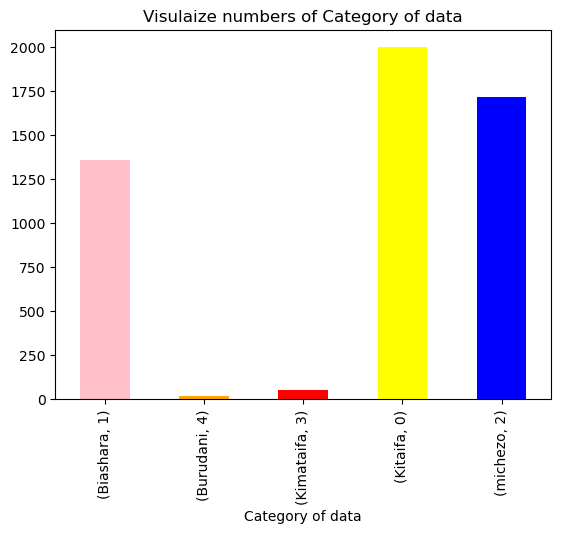

In [17]:
train.groupby('category').categoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

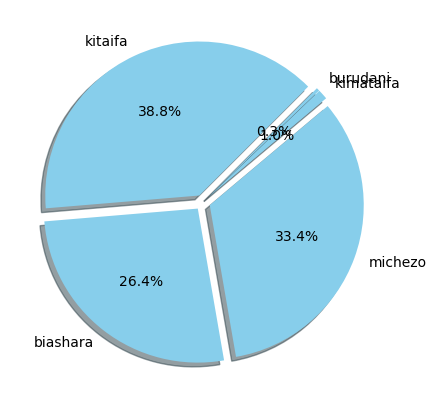

In [46]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
kitaifa = train[train['categoryId'] == 0 ]
biashara = train[train['categoryId'] == 1 ]
michezo = train[train['categoryId'] == 2]
kimataifa = train[train['categoryId'] == 3]
burudani = train[train['categoryId'] == 4]
count = [kitaifa['categoryId'].count(), biashara['categoryId'].count(), michezo['categoryId'].count(), kimataifa['categoryId'].count(), burudani['categoryId'].count()]
pie = plt.pie(count, labels = ['kitaifa', 'biashara', 'michezo', 'kimataifa', 'burudani'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

In [24]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
train['content'] = train['content'].apply(remove_tags)

In [25]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
train['content'] = train['content'].apply(special_char)

In [26]:
def convert_lower(text):
    return text.lower()
train['content'] = train['content'].apply(convert_lower)
train['content'][1]

' mkuu wa mkoa wa tabora  aggrey mwanri amesitisha likizo za viongozi wote mkoani humo kutekeleza maazimio ya jukwaa la fursa za biashara la mkoa huo mwanri ameagiza kuwa  hata kama kuna likizo zimeidhinishwa zifutwe amemuagiza katibu tawala wa mkoa huo  msalika makungu kuandika barua kwa viongozi kuhusu uamuzi huo na amebainisha kuwa hakushauriwa na mtu  kaamua yeye  anayebisha anyooshe mkono  ajifanye angalau anajikuna tu  amesema mwanri kwenye jukwaa hilo la nane lililomalizika leo amewaeleza viongozi wa tabora kuwa  mambo waliyopanga kuyafanya wakati wa likizo nje ya tabora wanaweza kuyafanya mkoani humo hivyo wawaite ndugu zao waende mkoani humo kiongozi huyo wa tabora amewaagiza maofisa ugani mkoani humo watoke ofisini wahamie shambani viongozi mbalimbali wamehudhuria jukwaa la tabora akiwemo mwenyekiti wa jukwaa hilo  waziri wa habari  utamaduni  sanaa na michezo  dk  harrison mwakyembe  waziri wa viwanda  biashara na uwekezaji joseph kakunda  mwenyekiti wa bodi ya kampuni ya ma

In [27]:
x = train['content']
y = train['categoryId']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(train.iloc[:,0].values)
y = np.array(train.categoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(train.content).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (5151, 5000)
y.shape =  (5151,)


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

3605
1546


In [34]:
#create list of model and accuracy dicts
perform_list = [ ]

In [35]:
def run_model(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':

        mdl = LogisticRegression()

    elif model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':

        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [36]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

C:\Users\grevi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\grevi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Test Accuracy Score of Basic Logistic Regression: % 85.25
Precision : 0.8525226390685641
Recall : 0.8525226390685641
F1-score : 0.8525226390685641


In [37]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 85.83
Precision : 0.8583441138421734
Recall : 0.8583441138421734
F1-score : 0.8583441138421734


In [38]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 82.54
Precision : 0.8253557567917206
Recall : 0.8253557567917206
F1-score : 0.8253557567917206


In [39]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 86.74
Precision : 0.8673997412677878
Recall : 0.8673997412677878
F1-score : 0.8673997412677878


In [40]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 69.34
Precision : 0.6934023285899095
Recall : 0.6934023285899095
F1-score : 0.6934023285899095


In [41]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 74.84
Precision : 0.7483829236739974
Recall : 0.7483829236739974
F1-score : 0.7483829236739974


In [42]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 75.29
Precision : 0.7529107373868047
Recall : 0.7529107373868047
F1-score : 0.7529107373868047


In [43]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,85.25,0.85,0.85,0.85
1,Random Forest,85.83,0.86,0.86,0.86
2,Multinomial Naive Bayes,82.54,0.83,0.83,0.83
3,Support Vector Classifer,86.74,0.87,0.87,0.87
4,Decision Tree Classifier,69.34,0.69,0.69,0.69
5,K Nearest Neighbour,74.84,0.75,0.75,0.75
6,Gaussian Naive Bayes,75.29,0.75,0.75,0.75


In [44]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

The best accuracy of model is 86.74 from Random


In [45]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
with open('model.pkl', 'wb') as file:
    model = pickle.dump(file)

In [ ]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)

In [48]:
np.save("x_test.npy", x_test)

In [49]:
import pickle

with open('x_test.pkl', 'wb') as file:
    pickle.dump(x_test, file)

In [50]:
np.load("x_test.npy")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
with open('x_test.pkl', 'rb') as file:
    model = pickle.load(file)